In [1]:
import pandas as pd
import utils
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Cargar los datos
ruta_archivo = '../proyecto2/data/mushroom_cleaned_dt4.csv'
df = utils.cargar_datos(ruta_archivo)
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [3]:
##Exploracion incial
utils.exploracion_inicial(df)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB
None
Estadisticas del dataset
       cap-diameter     cap-shape  gill-attachment    gill-color  \
count  54035.000000  54035.000000     54035.000000  54035.000000   
mean     567.257204      4.000315         2.142056      7.329509   
std      359.883763      2.160505         2.228821      3.200266   
min       

##### El presente dataset cuenta con 54035 filas con 9 columnas, no se ven datos nulos presentes. Segun la estadistica descriptiva, se puede observar lo siguiente:
* Variables como cap-diameter, stem-width, y stem-height tienen un rango amplio, lo que sugiere que podrían estar escaladas en diferentes unidades.
* Variables como gill-attachment, gill-color, stem-color, y season parecen ser categóricas pero están representadas numéricamente. Esto podría requerir una codificación más intuitiva (por ejemplo, transformar valores numéricos en etiquetas).
* La variable objetivo (class): Es binaria (0 y 1) con una media de ~0.55, lo que sugiere una distribución ligeramente desbalanceada, pero no extrema.

In [4]:
na_df = utils.identificar_valores_faltantes(df)
print(na_df)
utils.verificacion_elementos_duplicados(df)
##Elimnacion de datos duplicados detectados
df = df.drop_duplicates()
utils.verificacion_elementos_duplicados(df)

Valores faltantes en el dataset
                 datos sin NAs en q  Na en q  Na en %
cap-diameter                  54035        0      0.0
cap-shape                     54035        0      0.0
gill-attachment               54035        0      0.0
gill-color                    54035        0      0.0
stem-height                   54035        0      0.0
stem-width                    54035        0      0.0
stem-color                    54035        0      0.0
season                        54035        0      0.0
class                         54035        0      0.0
Cantidad de filas duplicadas:  303
Cantidad de filas duplicadas:  0


##### No se encontraron valores nulos pero si duplicados los cuales seran eliminados para no afectar el modelo.

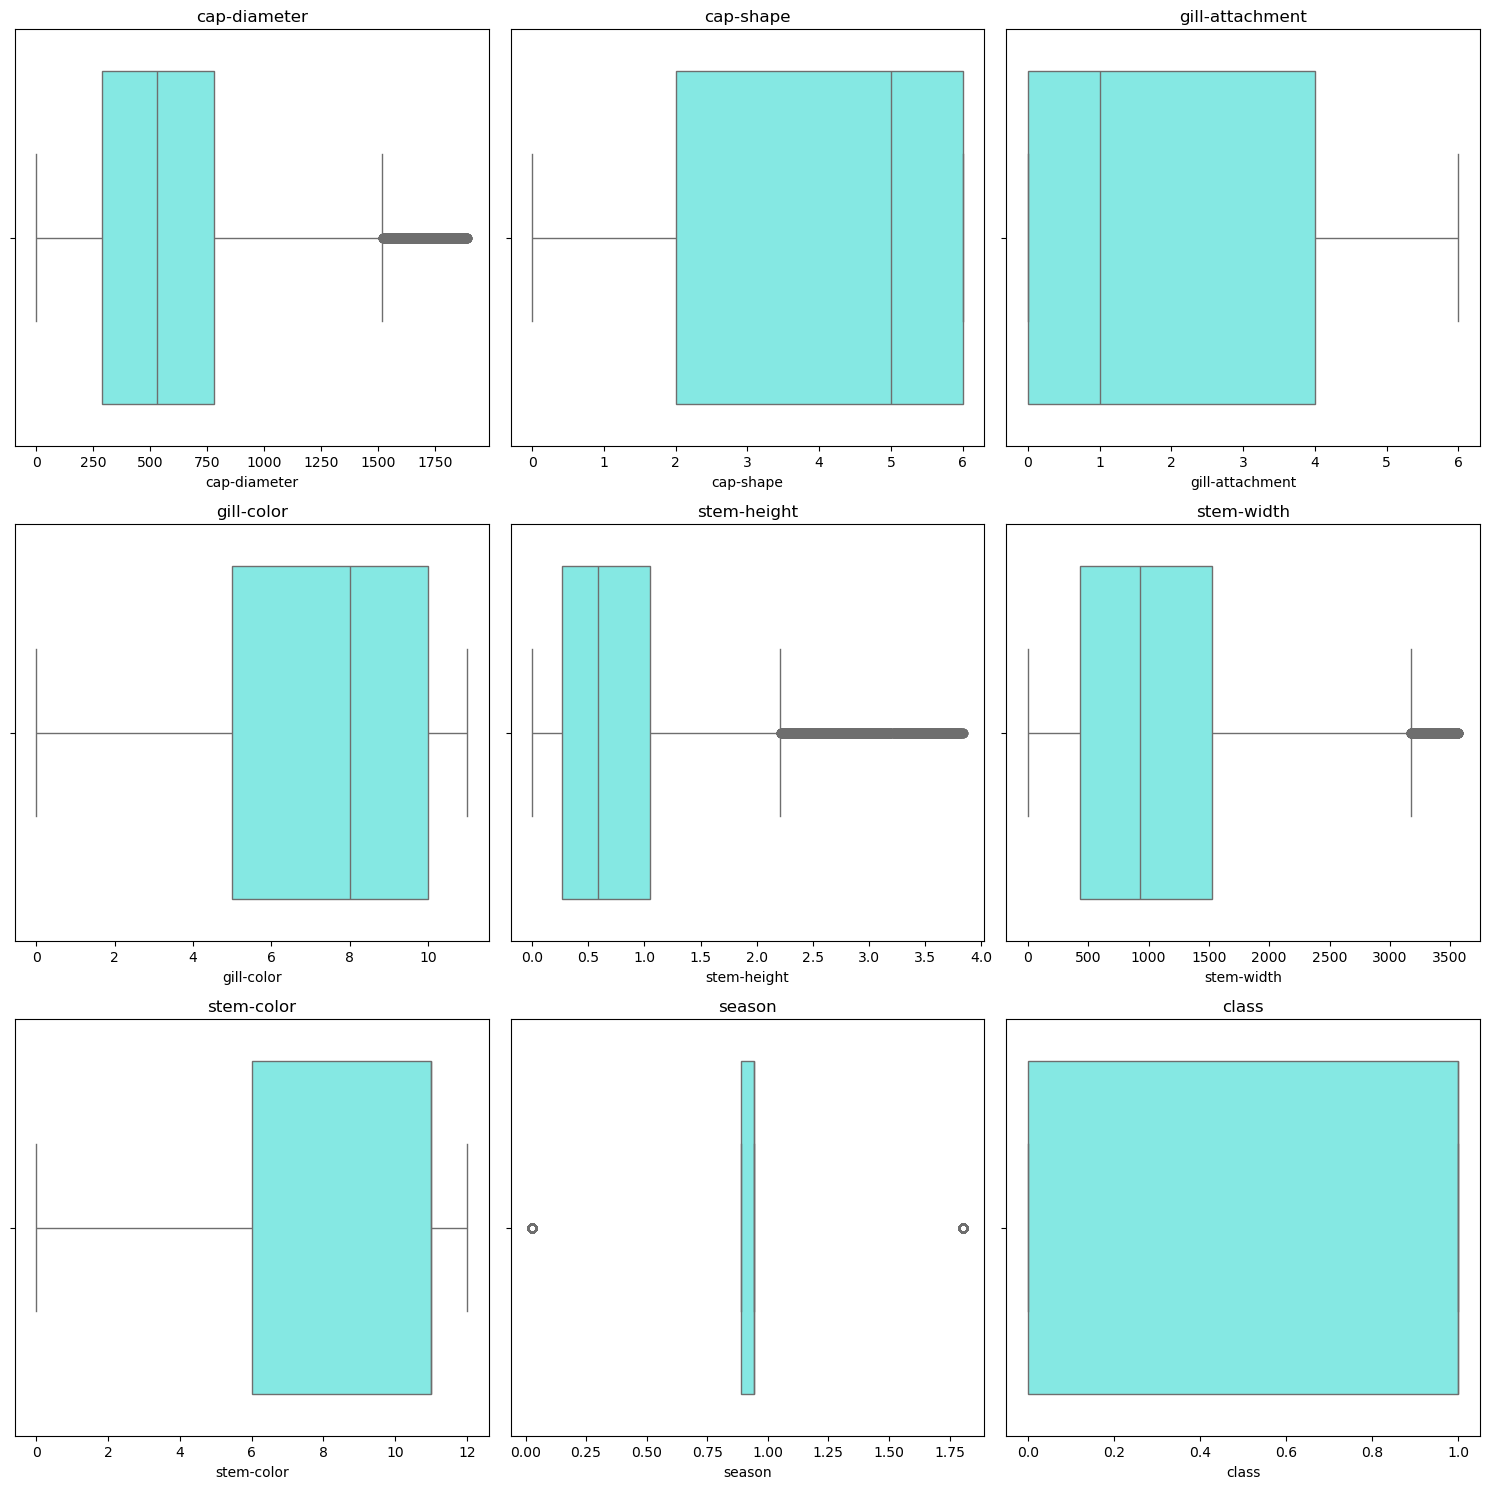

In [5]:
num_features = df.select_dtypes(include=['int64', 'float64'])
utils.plot_grafico_outliers(num_features,3,3,df)

##### Se encuentra variables con outliers en features como cap-diameter, stem-high, stem-with, sin embargo esto podria representar valores atipicos en el tamanho de los mushroom. 

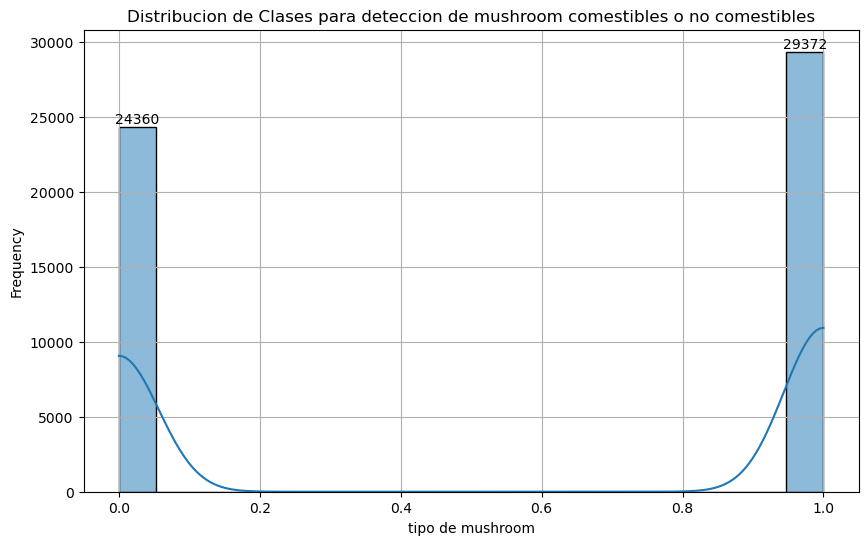

In [6]:
## Exploracion de datos
# Distribucion de la clase
plt.figure(figsize=(10, 6))
# Crear el histograma y almacenar la salida en una variable
hist = sns.histplot(df['class'], kde=True)
# Agregar los valores encima de las barras
for patch in hist.patches:  # Iterar sobre las barras
    x = patch.get_x() + patch.get_width() / 2  # Centro de la barra
    y = patch.get_height()  # Altura de la barra
    if y > 0:  # Mostrar solo si la frecuencia no es cero
        plt.text(x, y, int(y), ha='center', va='bottom', fontsize=10)
plt.title('Distribucion de Clases para deteccion de mushroom comestibles o no comestibles')
plt.xlabel('tipo de mushroom')
plt.ylabel('Frequency')
plt.grid()
plt.show()

##### En este grafico se puede ver que las clases estan distribuidas en una pequeña diferencia de las comestibles sobre las no comestibles. Sin embargo no tiene un desbalanceo muy grande.

>

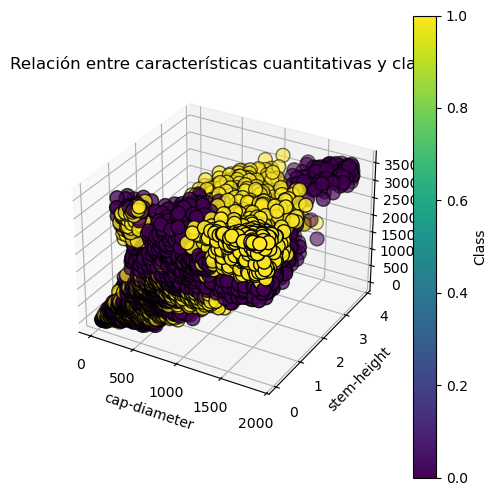

In [7]:
# Crear el primer gráfico: scatterplot 3D para características cuantitativas

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection='3d')

scatter = ax.scatter(df["cap-diameter"], df["stem-height"], df["stem-width"], c=df["class"], cmap="viridis", s=100, edgecolor="k")

ax.set_title("Relación entre características cuantitativas y clase")

ax.set_xlabel("cap-diameter")

ax.set_ylabel("stem-height")

ax.set_zlabel("stem-width")

plt.colorbar(scatter, ax=ax, label="Class")


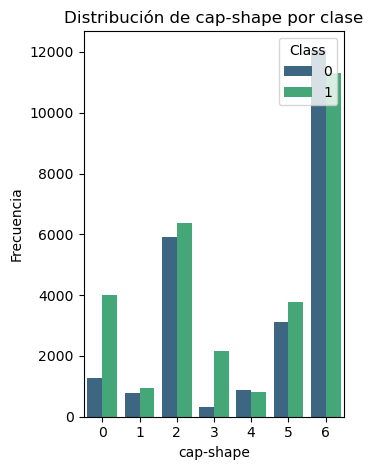

In [8]:
# Crear el segundo gráfico: gráfico de barras agrupadas para características categóricas

plt.subplot(122)

sns.countplot(data=df, x="cap-shape", hue="class", palette="viridis")

plt.title("Distribución de cap-shape por clase")

plt.xlabel("cap-shape")

plt.ylabel("Frecuencia")

plt.legend(title="Class", loc="upper right")



plt.tight_layout()

plt.show()